Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
path = '/content/drive/MyDrive/titanic/train.csv'
train_org_df = pd.read_csv(path)
train_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_org_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Data Cleaning
train_clean = train_org_df[:]
row_count = train_clean.shape[0]

mis_count = train_clean.count()
for_delete = []

for i in range(len(mis_count)):
    if mis_count[i] / row_count < 0.3:
        for_delete.append(i)

train_clean.drop(train_clean.columns[for_delete], axis='columns', inplace=True)
train_clean.drop_duplicates(inplace=True)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<ipython-input-4-3c58f526e8bd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean.drop(train_clean.columns[for_delete], axis='columns', inplace=True)
<ipython-input-4-3c58f526e8bd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean.drop_duplicates(inplace=True)


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

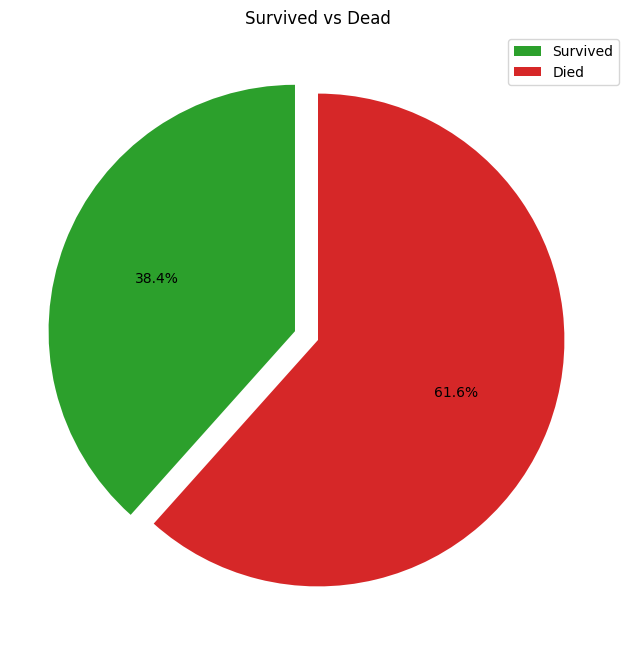

In [5]:
survived = train_clean['Survived'].sum()

pie_data = [survived, train_clean.shape[0] - survived]
labels = 'Survived', 'Died'
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(pie_data, explode=explode, autopct='%1.1f%%', startangle=90, colors=['#2ca02c', '#d62728'])
plt.title('Survived vs Dead')
plt.legend(labels)

На візуалізації "Survived vs Dead" зелена частина графіку показує кількість виживших (38,4%), червона частина графіку показує кількість загиблих (61,6%). Зразу кидається в очі те, що більша частина людей загинула.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


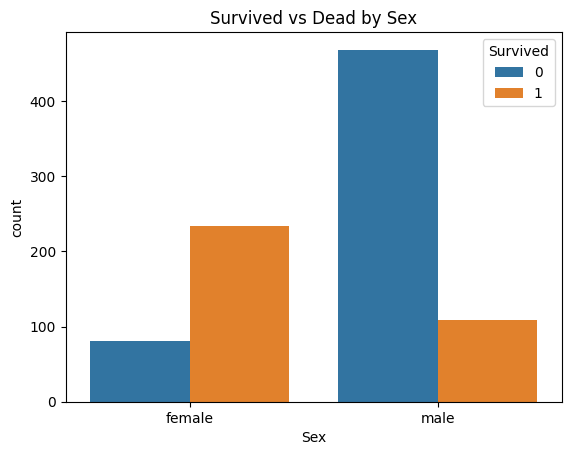

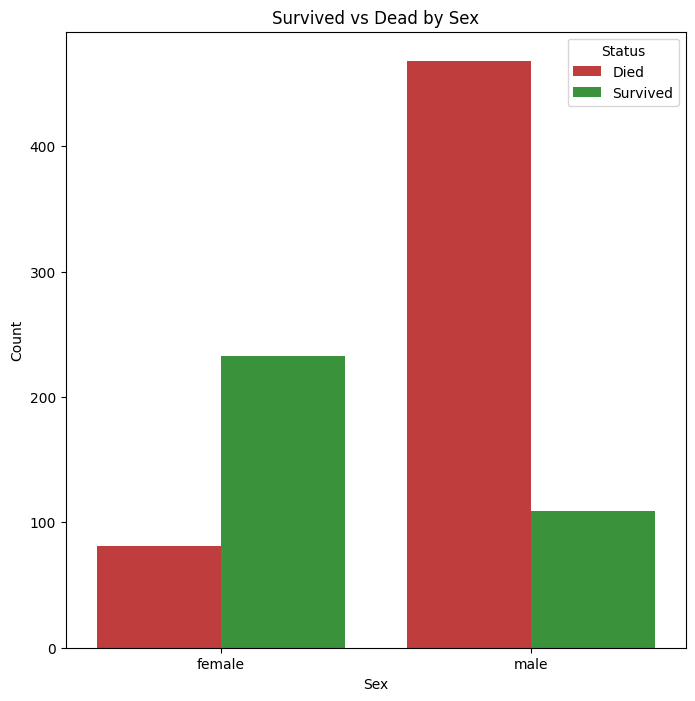

In [6]:
bar_data = train_clean[['Sex', 'Survived']].groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(8, 8))
bar_plot = sns.barplot(data=bar_data, x='Sex', y='size', hue='Survived', palette=['#d62728', '#2ca02c'])

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

handles = bar_plot.get_legend_handles_labels()[0]
plt.legend(handles=handles, title='Status', labels=['Died', 'Survived'])

З цієї візуалізації можемо зробити висновок, що жінок було більше, ніж чоловіків. Серед чоловіків більше вижило, ніж загинуло, а серед жінок навпаки.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

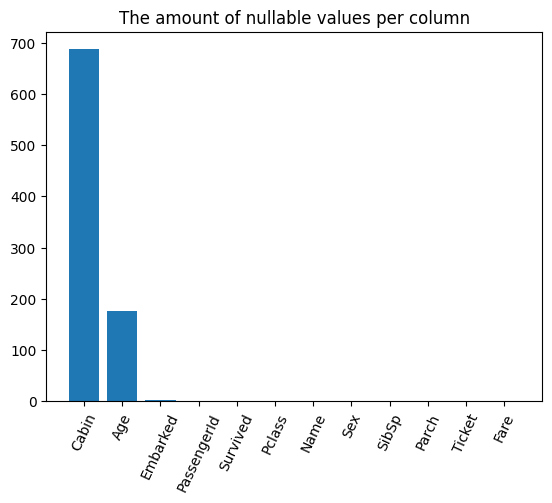

Text(0, 0.5, 'Count')

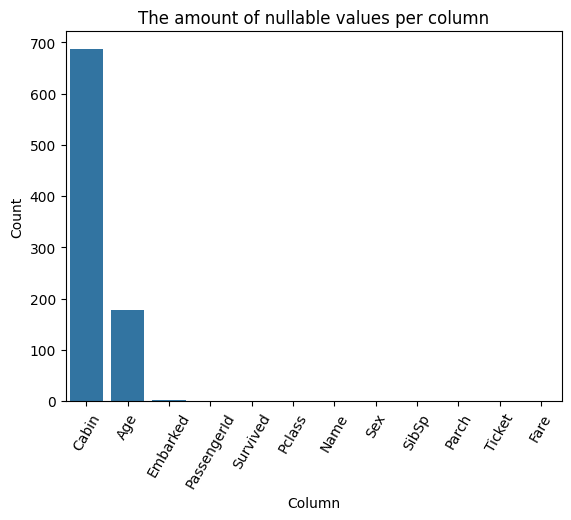

In [7]:
amount = train_org_df.count()
amount = 891 - amount
amount = amount.sort_values(ascending=False)

bar_plot = sns.barplot(x=amount.index.to_list(), y=amount)
plt.xticks(rotation=60)

plt.title('The amount of nullable values per column')
plt.xlabel('Column')
plt.ylabel('Count')

З даної візуалізації видно, що в стовпчику "Cabin" дуже багато пропущених значень. Враховуючи, що всього значень 891, то цей стовпчик варто видалити, бо відсоток не нульових значень менший за 30.

У стовпчику "Age" також немало пропущених значень, але їх відсоток менший за 30. У стовпчику "Embarked" практично немає пропущених значень, а в усіх іншиш - немає пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

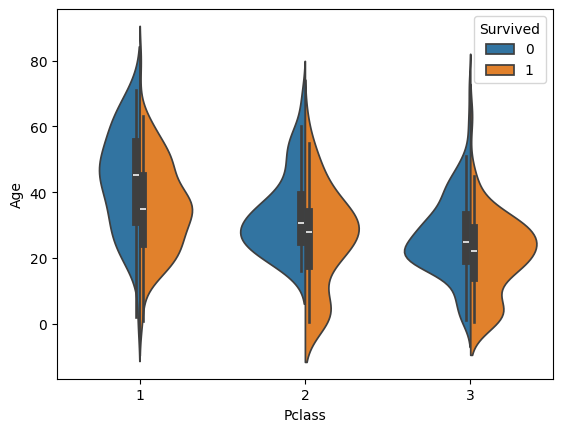

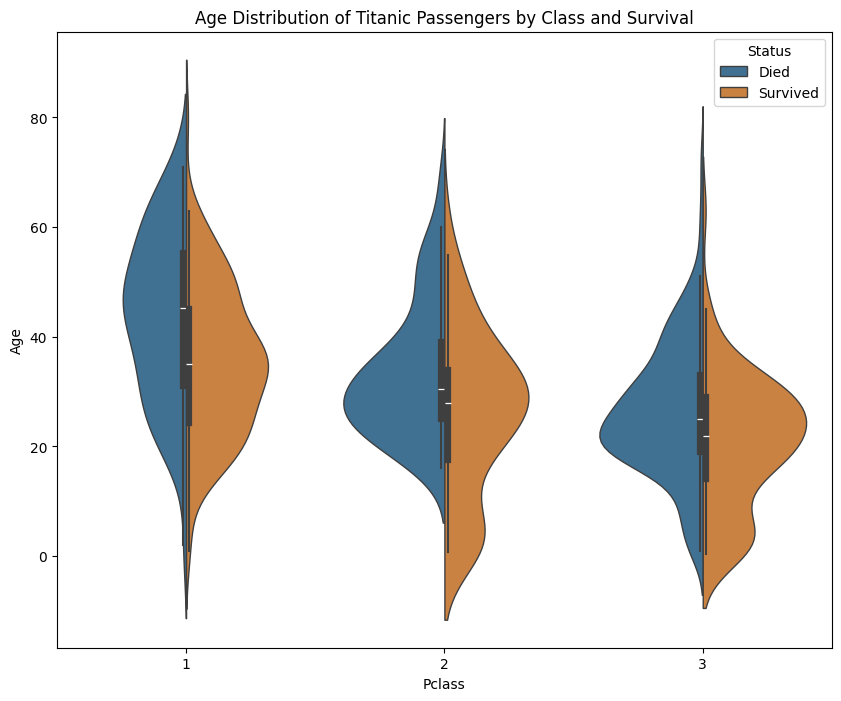

In [8]:
plt.figure(figsize=(10, 8))
vio_plot = sns.violinplot(data=train_clean, x="Pclass", y="Age", hue="Survived", split=True, inner="box", linewidth=1, palette={0: "#3274a1", 1: "#e1812c"})

plt.title("Age Distribution of Titanic Passengers by Class and Survival")
handles = vio_plot.get_legend_handles_labels()[0]
plt.legend(handles=handles, title='Status', labels=['Died', 'Survived'])

У 1 клас пішло більше людей різного віку, ніж в інші. Середній вік загиблих у всіх класах нижчий, ніж виживших. У 3 класі вік загиблих приблизно такий же, як і у виживших, а в інших двох класах вік загиблих та виживших сильно відрізняється.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


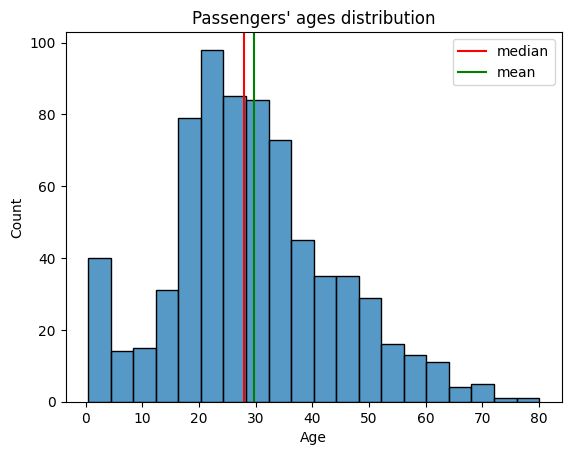

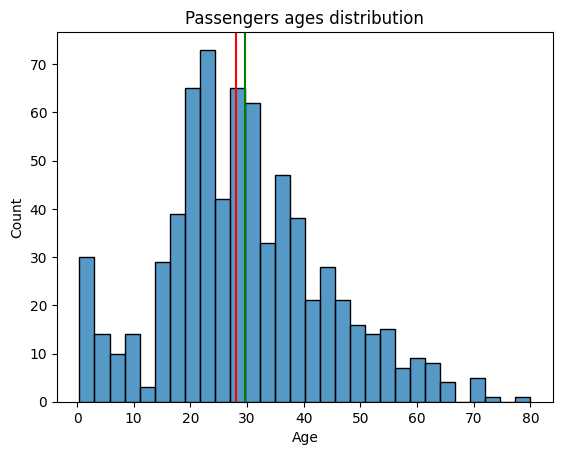

In [9]:
mean_age = train_clean['Age'].mean()
median_age = train_clean['Age'].median()

sns.histplot(train_clean, x="Age", bins=30)

plt.title('Passengers ages distribution')

plt.axvline(mean_age, color='green', linestyle='-', label='mean')
plt.axvline(median_age, color='red', linestyle='-', label='median')

Найбільше людей було віком від 21 до 25 років. найменше людей - від 70 до 80. Середній вік десь 29-30 років, а медіана 27-28 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Я хочу побачити найпопулярніші імена серед чоловіків та жінок.

<ipython-input-10-ff6e13b8852f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_name['first_name'] = train_clean['Name'].str.extract(r'\(([A-Za-z\-\']+)', expand=True)
<ipython-input-10-ff6e13b8852f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_name['first_name_2'] = train_clean['Name'].str.extract(r'(Mr\.|Mrs\.|Miss\.|Ms\.|Master\.|Rev\.|Don\.|Dona\.|Lady\.|Sir\.|Mme\.|Mlle\.|Countess\.|Col\.|Capt\.|Jonkheer\.|Dr\.|Major\.) ([A-Za-z\-\']+)', expand=True)[1]
<ipython-input-10-ff6e13b8852f>:

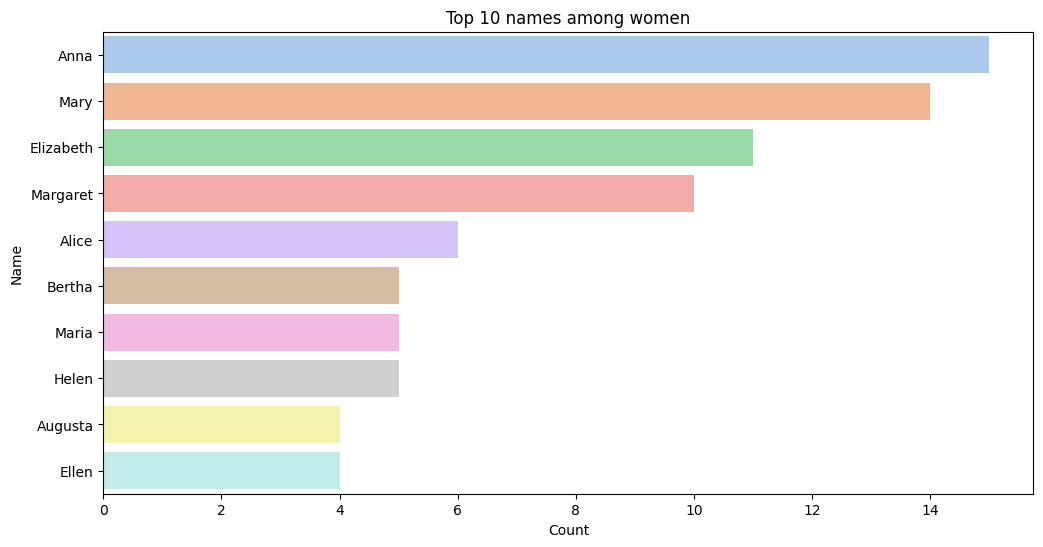

<ipython-input-10-ff6e13b8852f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='first_name', data=male_data, palette='deep')


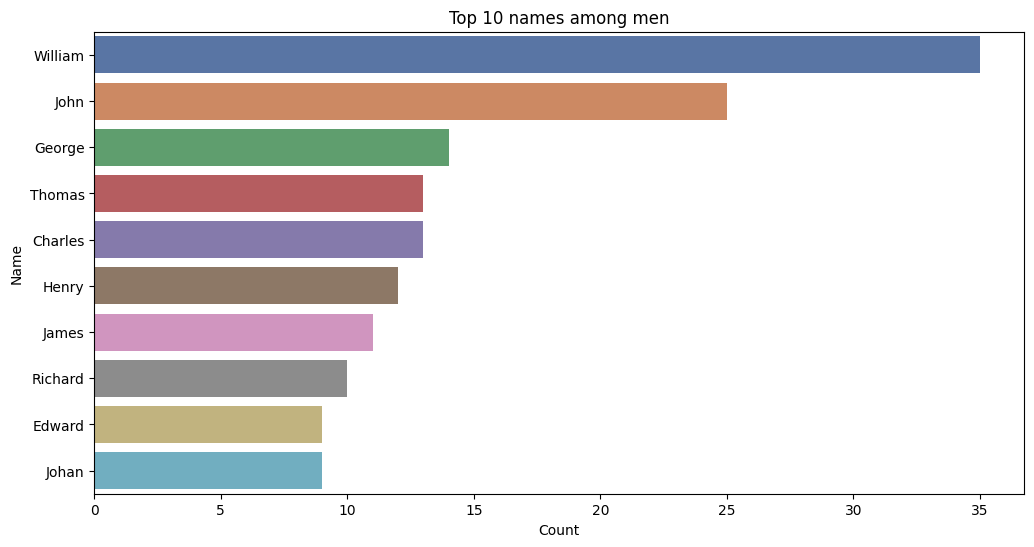

In [10]:
train_name = train_clean[:]

train_name['first_name'] = train_clean['Name'].str.extract(r'\(([A-Za-z\-\']+)', expand=True)
train_name['first_name_2'] = train_clean['Name'].str.extract(r'(Mr\.|Mrs\.|Miss\.|Ms\.|Master\.|Rev\.|Don\.|Dona\.|Lady\.|Sir\.|Mme\.|Mlle\.|Countess\.|Col\.|Capt\.|Jonkheer\.|Dr\.|Major\.) ([A-Za-z\-\']+)', expand=True)[1]

train_name['first_name'] = train_name['first_name'].fillna(train_name['first_name_2'])
train_name = train_name.drop(['first_name_2'], axis=1)

data = train_name.groupby(['Sex', 'first_name'], as_index=False).size()
data = data.rename(columns={'size': 'Count'})

female_data = data[data['Sex'] == 'female'].sort_values('Count', ascending=False).head(10)
male_data = data[data['Sex'] == 'male'].sort_values('Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='first_name', data=female_data, palette='pastel')
plt.title('Top 10 names among women')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='first_name', data=male_data, palette='deep')
plt.title('Top 10 names among men')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

За цими візуалізаціями я бачу, що найпопулярніше чоловіче ім'я "William" (35), а жіноче - "Anna" (15).

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

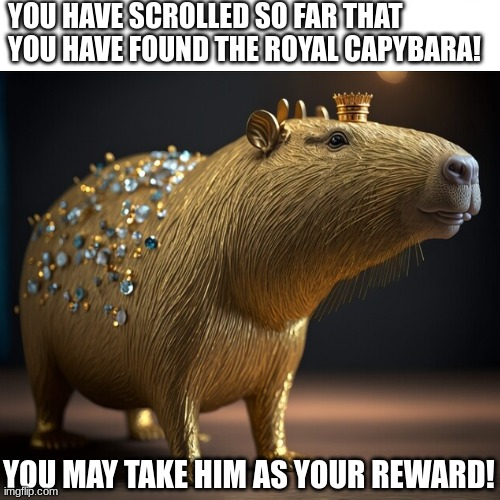